In [127]:
library("data.table")
library("qtl")

# inputs

In [128]:
genfile =  '../data/20200713_xo3mb_missing_ws200_bs1e6_res10kb_3mbfilled.csv'
phefile = '../data/20200708_intersection_normbw8.csv'

In [129]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

 --Read the following data:
	 3135  individuals
	 1088  markers
	 5  phenotypes
 --Cross type: f2 


In [130]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     5 
    Percent phenotyped: 100 100 98 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  51.9 
    Genotypes (%):      AA:26.4  AB:47.5  BB:26.1  not BB:0.0  not AA:0.0 

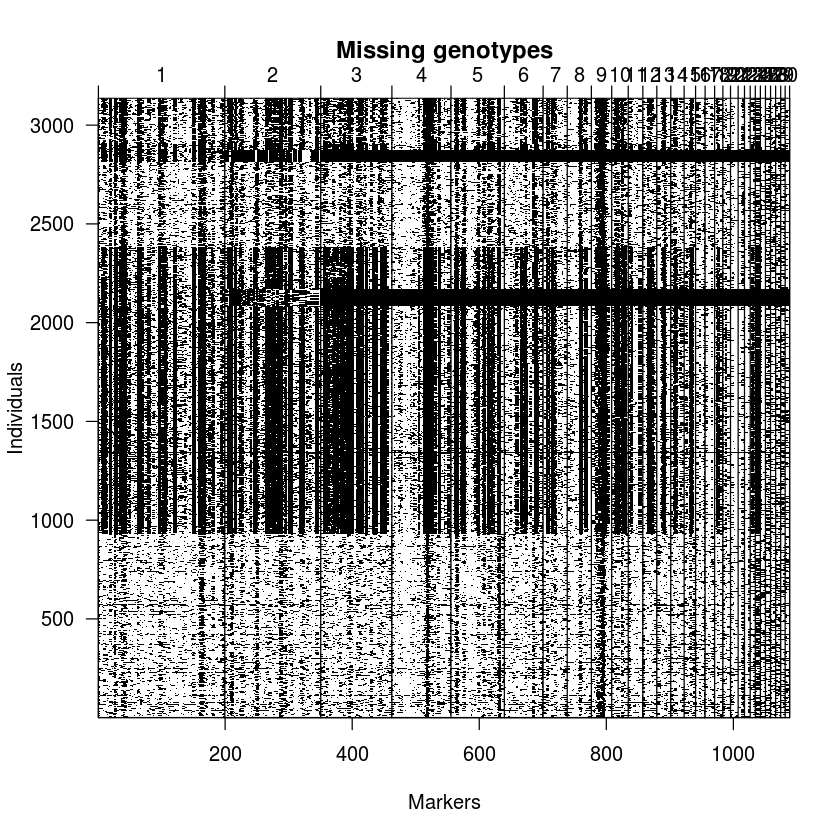

In [131]:
plotMissing(datf2)

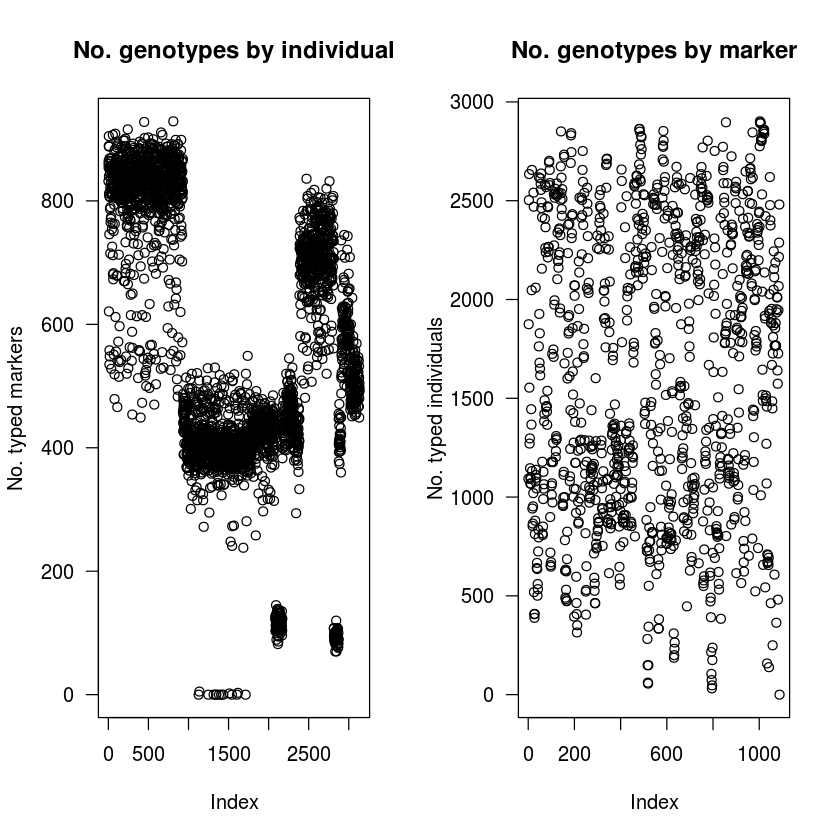

In [132]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [133]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [134]:
todrop

[1] "1-25"  "1-26"  "1-27"  "1-160" "1-162" "1-165" "1-166" "1-198" "2-9"  
[10] "2-10"  "2-11"  "2-12"  "2-50"  "2-89"  "2-90"  "4-53"  "4-54"  "4-55" 
[19] "4-56"  "4-57"  "4-58"  "5-8"   "5-9"   "5-10"  "5-74"  "5-75"  "5-76" 
[28] "5-77"  "5-78"  "6-47"  "9-12"  "9-13"  "9-14"  "9-15"  "9-16"  "9-17" 
[37] "9-18"  "9-19"  "9-20"  "9-21"  "10-25" "23-7"  "24-7"  "25-7"  "26-7" 
[46] "28-7"  "29-6"  "30-6"

In [135]:
datf2.1 <- drop.markers(datf2, todrop)

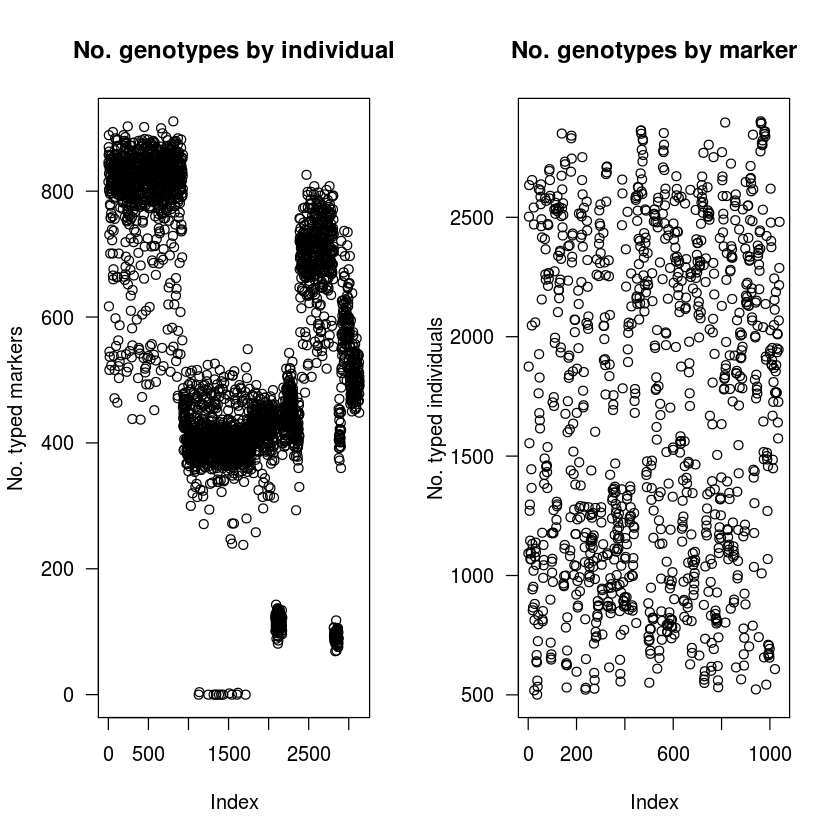

In [136]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [137]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [138]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3135

[1] 3064

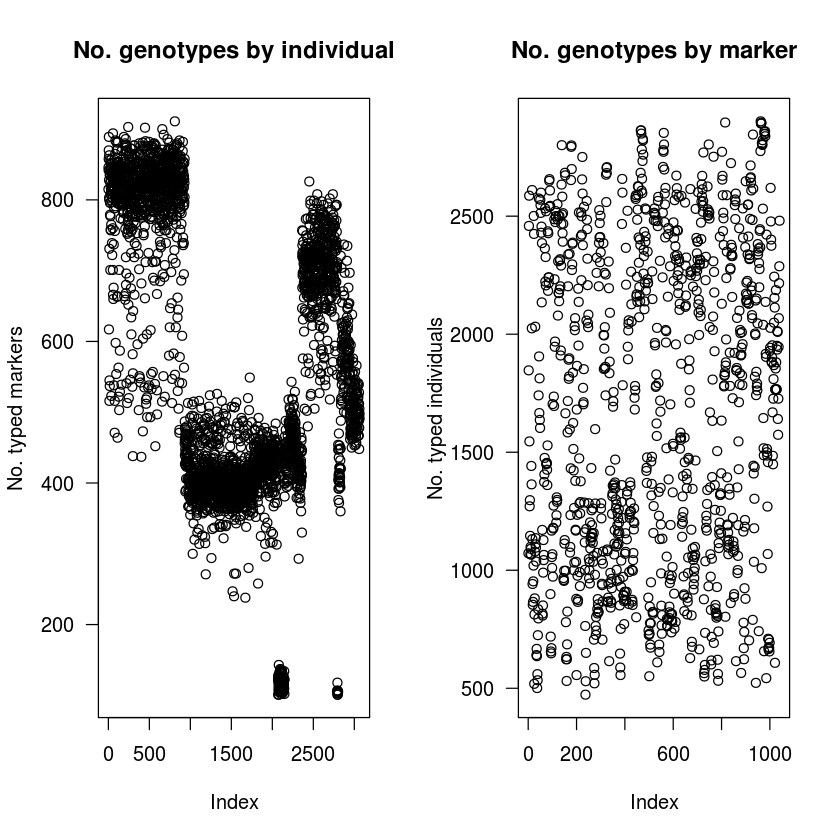

In [139]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [140]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3064 

    No. phenotypes:     5 
    Percent phenotyped: 100 100 98 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1040 
    No. markers:        191 144 112 87 76 60 38 38 22 25 23 22 22 21 18 15 15 13 
                        12 12 10 9 7 7 7 7 8 7 6 6 
    Percent genotyped:  54.9 
    Genotypes (%):      AA:26.4  AB:47.5  BB:26.1  not BB:0.0  not AA:0.0 

In [141]:
cg <- comparegeno(datf2.2)

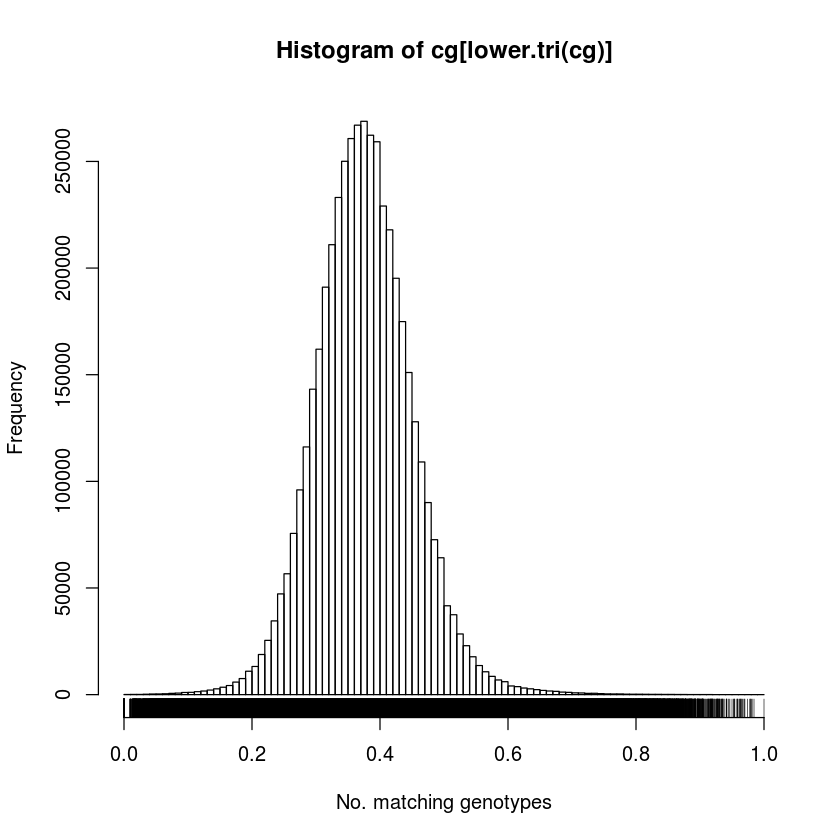

In [142]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [143]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [144]:
wh

row,col
515,538
538,936
874,936
538,1161
874,1161
1107,1325
538,1500
1238,1504
1948,2055
1022,2072


In [145]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`2-2`
[1] "2-1"

$`2-149`
[1] "2-150"

$`3-2`
[1] "3-1"

$`3-110`
[1] "3-111"

$`5-0`
[1] "4-92"

$`5-2`
[1] "5-1"

$`5-82`
[1] "5-83"

$`6-56`
[1] "6-57" "6-58" "6-59"

$`7-0`
[1] "6-60"

$`7-8`
[1] "7-7"

$`8-2`
[1] "7-37" "8-0"  "8-1" 

$`8-35`
[1] "8-36"

$`9-0`
[1] "8-37" "9-1" 

$`9-30`
[1] "9-31"

$`10-0`
[1] "10-1"

$`11-0`
[1] "11-1"

$`11-21`
[1] "11-22"

$`13-0`
[1] "12-21"

$`13-1`
[1] "13-2"

$`13-20`
[1] "13-19" "13-21"

$`15-1`
[1] "14-20"

$`16-0`
[1] "15-17"

$`16-11`
[1] "16-12" "16-13" "16-14"

$`18-0`
[1] "17-14"

$`18-11`
[1] "18-12"

$`19-10`
[1] "19-11"

$`20-10`
[1] "20-8"  "20-9"  "20-11"

$`22-0`
[1] "21-9"

$`22-4`
[1] "22-8"

$`23-3`
[1] "23-4"

$`27-6`
[1] "27-7"

$`28-5`
[1] "28-6"

$`29-3`
[1] "29-4"

$`30-5`
[1] "30-4"



In [146]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“Sex column should be coded as 0=female 1=male; sex ignored.”

In [147]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-0,1,1992,138,628,306,0,0,5.102414e-19
1-1,1,1217,281,961,605,0,0,4.520048e-26
1-2,1,605,428,1213,818,0,0,1.098509e-27
1-3,1,477,465,1271,851,0,0,6.564708e-26
1-23,1,639,699,1171,555,0,0,4.671991e-05
1-42,1,2339,143,423,159,0,0,2.893829e-05
1-43,1,2229,160,478,197,0,0,3.023269e-05
1-46,1,489,719,1314,542,0,0,3.014614e-06
1-71,1,700,572,1107,685,0,0,3.867483e-05
1-76,1,543,684,1322,515,0,0,5.979077e-07


In [148]:
length(todrop)

[1] 470

In [149]:
datf2.3 <- datf2.2

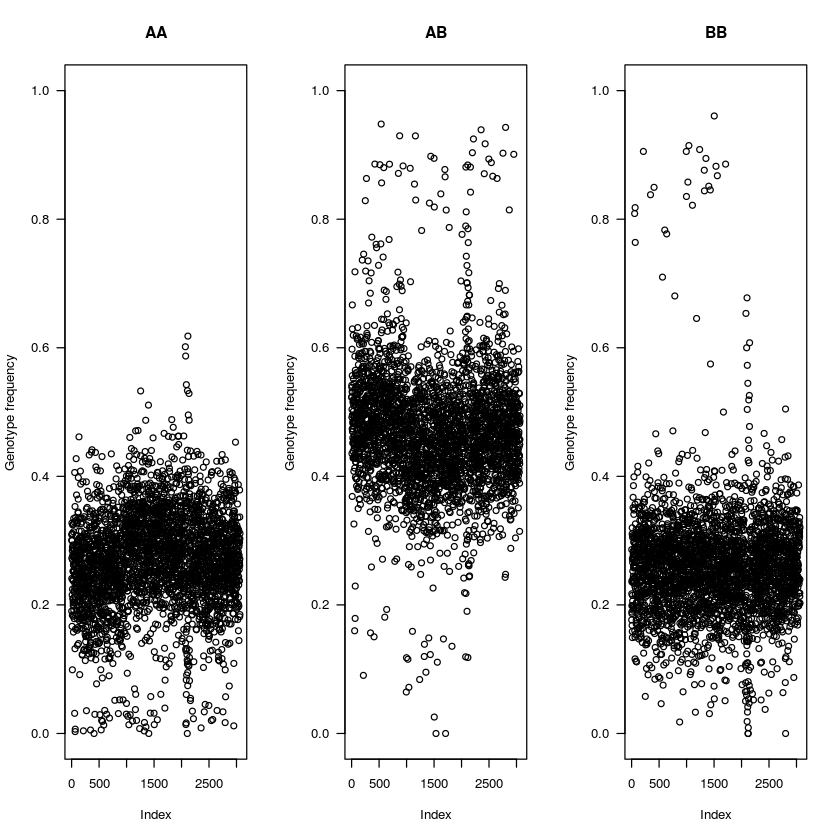

In [150]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

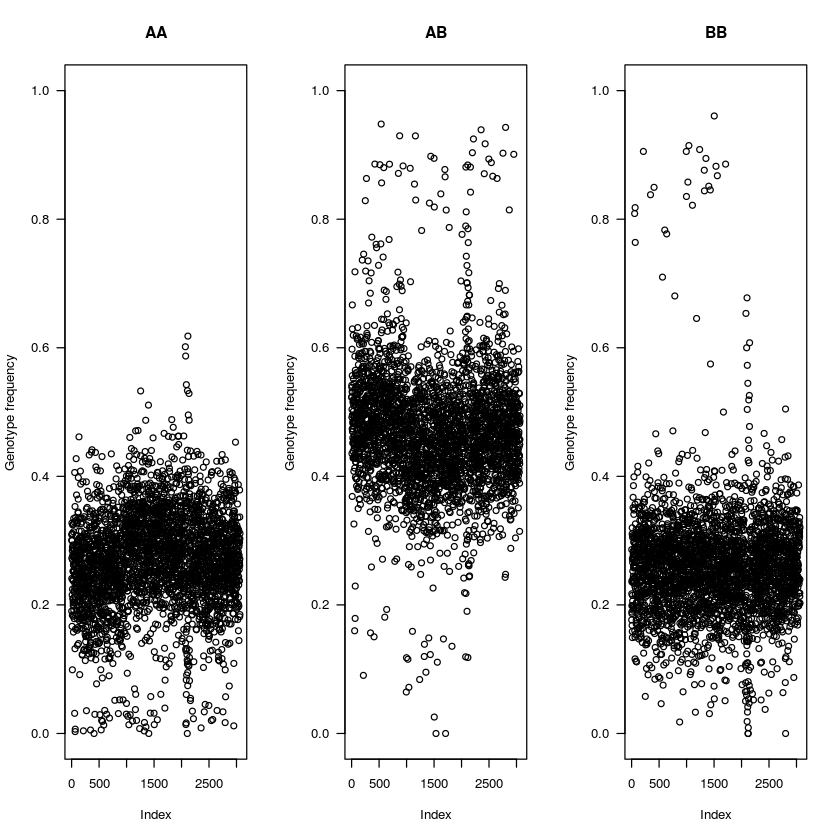

In [151]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [152]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [153]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [154]:
datf2.4 <- datf2.3

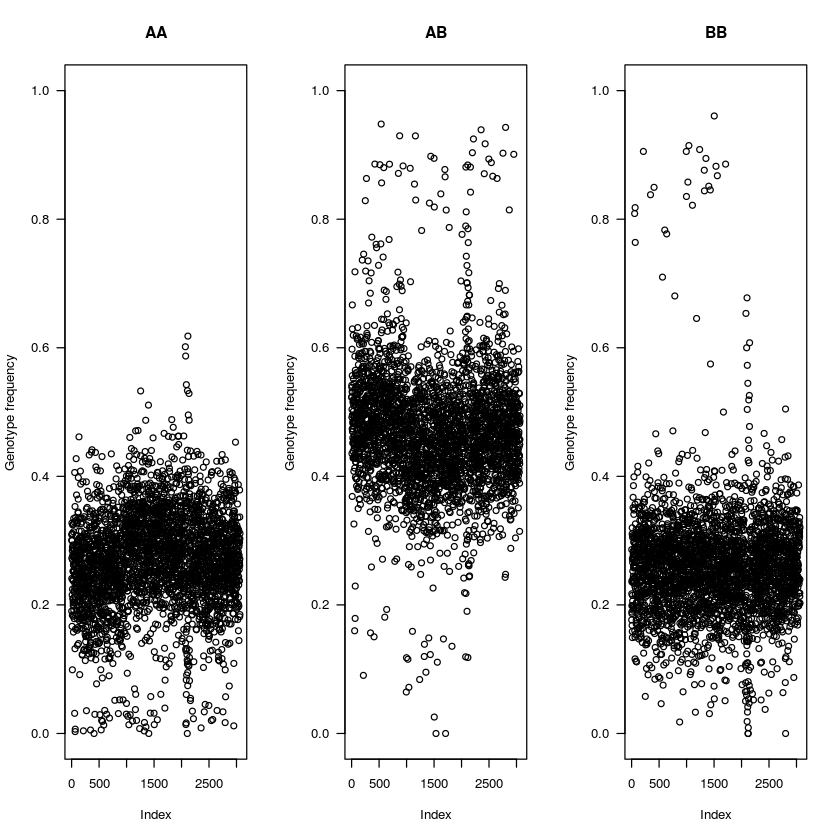

In [155]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [156]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

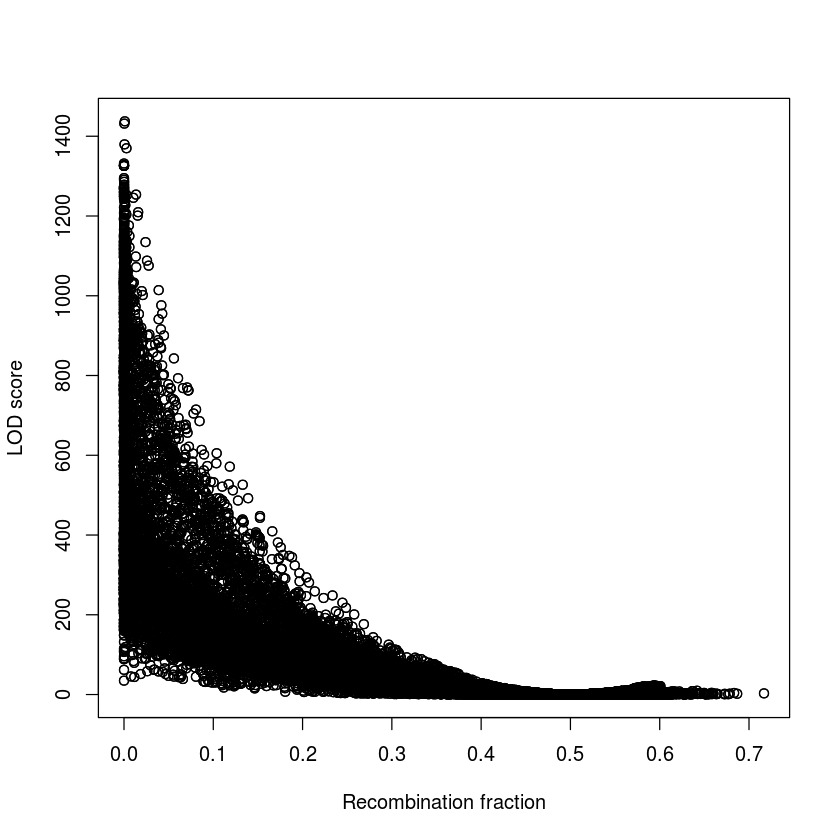

In [157]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

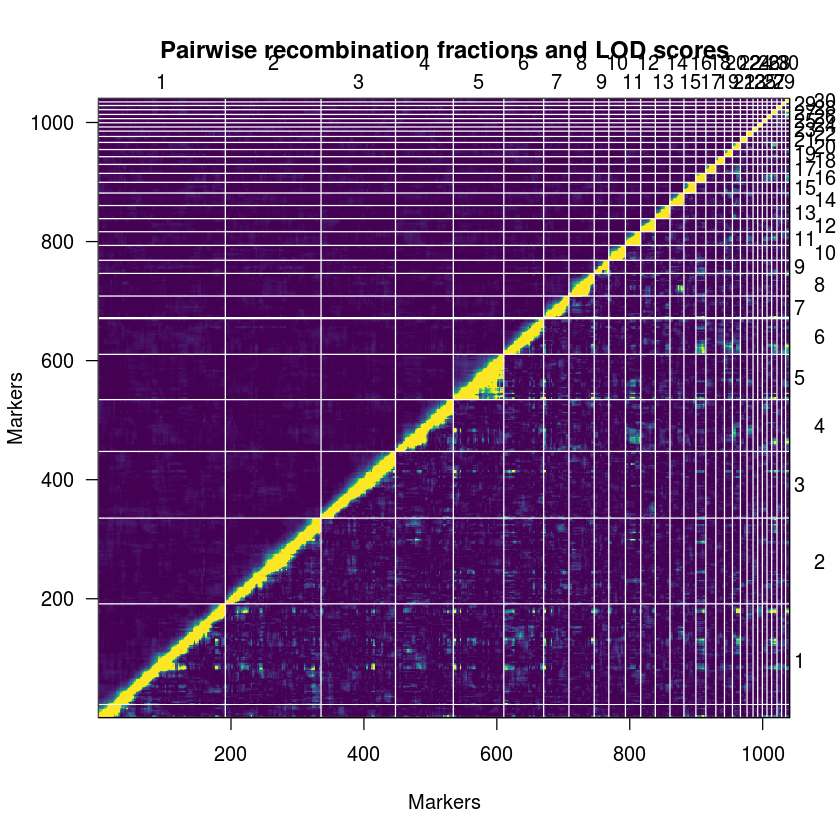

In [158]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [159]:
#genmap <- est.map(datf2.4, error.prob=0.005)

In [160]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
1,165,5.024931e+02,3.063982542,20.01036691
2,124,3.605690e+02,2.931455292,19.04373267
3,112,2.476191e+02,2.230803091,13.26284876
4,86,2.254586e+02,2.652454595,12.22364159
5,76,1.702823e+02,2.270430055,10.48278121
6,59,1.556891e+02,2.684295635,11.98947913
7,38,9.226715e+01,2.493706755,12.38659110
8,38,9.042271e+01,2.443857026,19.79937111
9,22,5.778731e+01,2.751776889,14.87959992
10,25,4.394158e+01,1.830899232,13.46814447


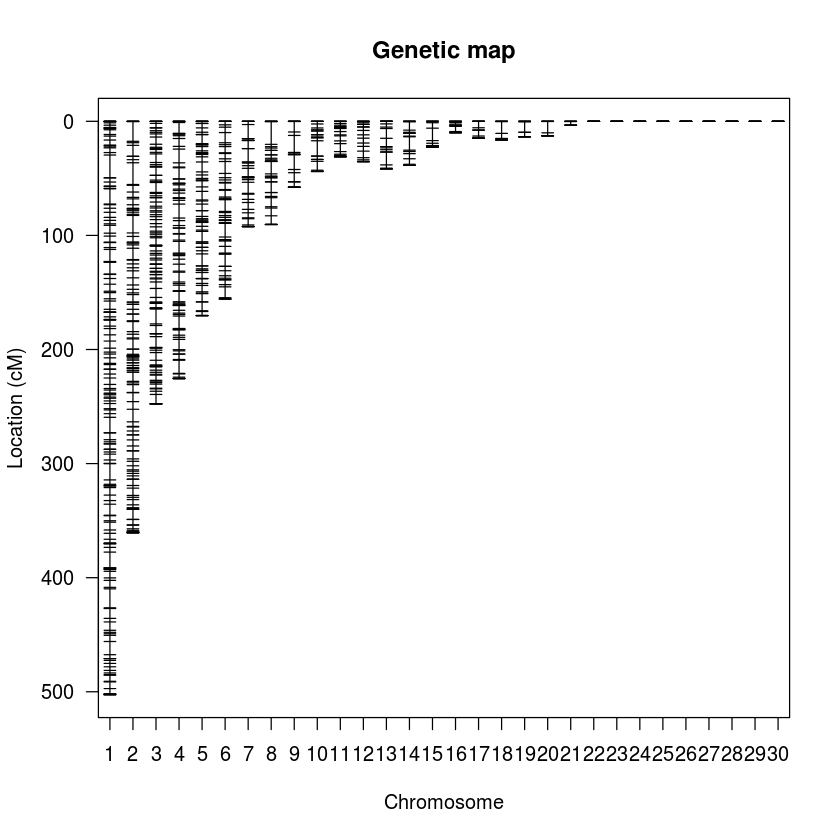

In [161]:
plotMap(genmap)

In [162]:
datf2.4 <- replace.map(datf2.4, genmap)

ERROR: Error in replacemap.cross(cross, map): Number of markers don't match.


In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [ ]:
datf2.5 <- datf2.4

In [ ]:
plotPheno(datf2.5, pheno.col=3)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [ ]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [ ]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [ ]:
out.em <- scanone(datf2.5, pheno.col = 2)

In [ ]:
plot(out.em, chr=1)

In [ ]:
plot(out.em)

In [ ]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [ ]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [ ]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

In [ ]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac2)

In [ ]:
out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

In [ ]:
plot(out.acovar2)

In [ ]:
plot(out.acovar2, chr=1)

In [ ]:
plot(out.acovar, chr=1)

In [ ]:
out.acovar2

In [ ]:
write.csv(out.acovar2, "20200713_out_all_normbw8_ctrlsex_ws200_bs1e6_xo3mb_fill3mb_no_dens.csv")